<a href="https://colab.research.google.com/github/Anshu-1101/Emotion_detection_from_text/blob/main/text_emotion_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Emotion detection of text

In [17]:
import pandas as pd
import numpy as np

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns


In [19]:
!pip install neattext

     |████████████████████████████████| 112 kB 7.2 MB/s 


In [20]:
import neattext.functions as nfx

In [21]:
#loading the dataset
df=pd.read_csv("/content/sample_data/data/emotion_dataset_2.csv")
df.head()


,Unnamed: 0,Emotion,Text,Clean_Text
0,0,neutral,Why ?,NaN
1,1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow
2,2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3,3,joy,Such an eye ! The true hazel eye-and so brill...,eye true hazel eyeand brilliant Regular feat...
4,4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe hugggzzz u babe naamazed nga ako e...


In [22]:
df.shape

(34792, 4)

In [23]:
df.dtypes

Unnamed: 0     int64
Emotion       object
Text          object
Clean_Text    object
dtype: object

In [24]:
9#counts of emotions
df['Emotion'].value_counts()

joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: Emotion, dtype: int64

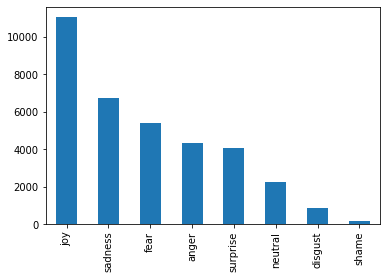

In [25]:
df['Emotion'].value_counts().plot(kind='bar')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


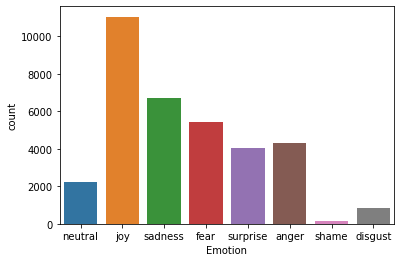

In [26]:
#using seaborn 
#old method
sns.countplot(df['Emotion'])

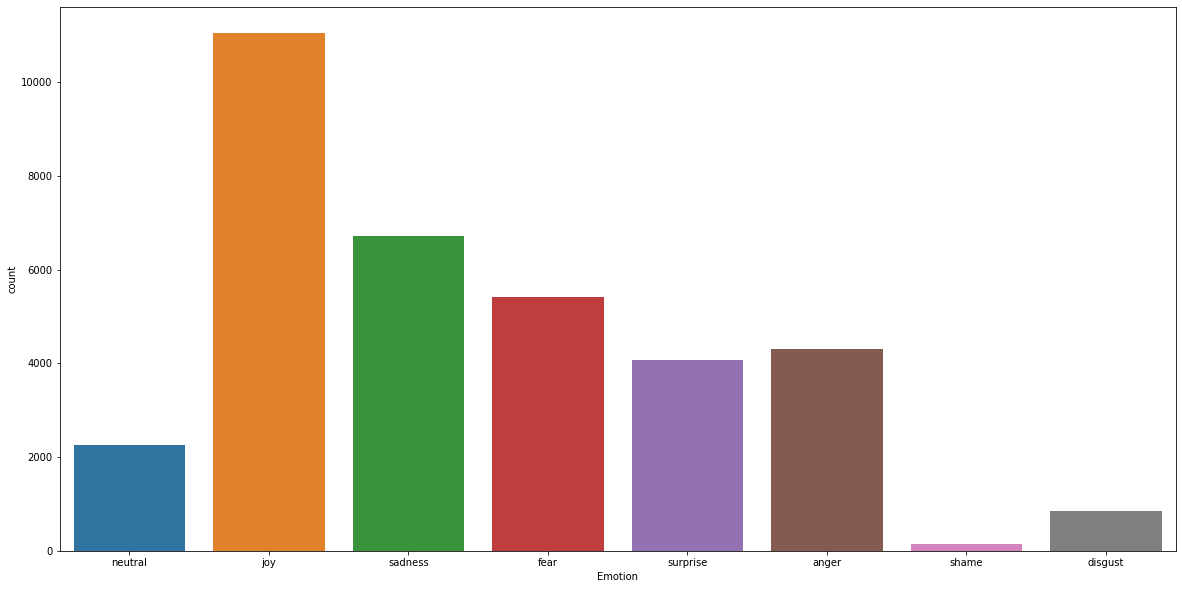

In [27]:
plt.figure(figsize=(20,10))
sns.countplot(x="Emotion", data=df)
plt.show()


#                                                                  **Exploration**
  . sentiment analysis

  . keyword extraction
    
    Keywords for each emotion
    Wordcloud
 


 



In [28]:
#SENTIMENT ANALYSIS
from textblob import TextBlob

In [29]:
def get_sentiment(text):
  blob = TextBlob(text)
  sentiment= blob.sentiment.polarity
  if sentiment > 0:
    result="Positive"
  elif sentiment < 0:
    result="Negative"
  else:
    result="Neutral"
  return result

In [30]:
#testing the function
get_sentiment("i am in a great mood today")

'Positive'

In [31]:
df['Sentiment']= df['Text'].apply(get_sentiment)

In [32]:
df.head()

,Unnamed: 0,Emotion,Text,Clean_Text,Sentiment
0,0,neutral,Why ?,NaN,Neutral
1,1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow,Neutral
2,2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...,Negative
3,3,joy,Such an eye ! The true hazel eye-and so brill...,eye true hazel eyeand brilliant Regular feat...,Positive
4,4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe hugggzzz u babe naamazed nga ako e...,Neutral


In [33]:
# Comparing our Emotions vs Sentiment

In [34]:
df.groupby(['Emotion', 'Sentiment']).size()


Emotion   Sentiment
anger     Negative     1787
          Neutral      1386
          Positive     1124
disgust   Negative      325
          Neutral       249
          Positive      282
fear      Negative     1534
          Neutral      1843
          Positive     2033
joy       Negative     1682
          Neutral      3648
          Positive     5715
neutral   Negative      178
          Neutral      1523
          Positive      553
sadness   Negative     2630
          Neutral      2127
          Positive     1965
shame     Negative       46
          Neutral        50
          Positive       50
surprise  Negative      623
          Neutral      1545
          Positive     1894
dtype: int64

In [35]:
#plotting the data emotion vs sentiments

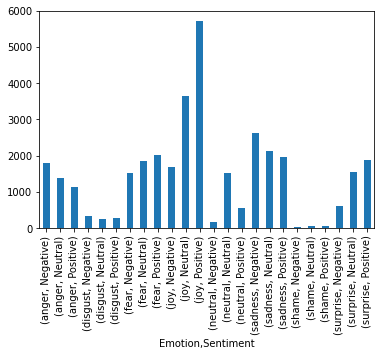

In [36]:
#1.matplotlib
df.groupby(['Emotion', 'Sentiment']).size().plot(kind="bar")

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


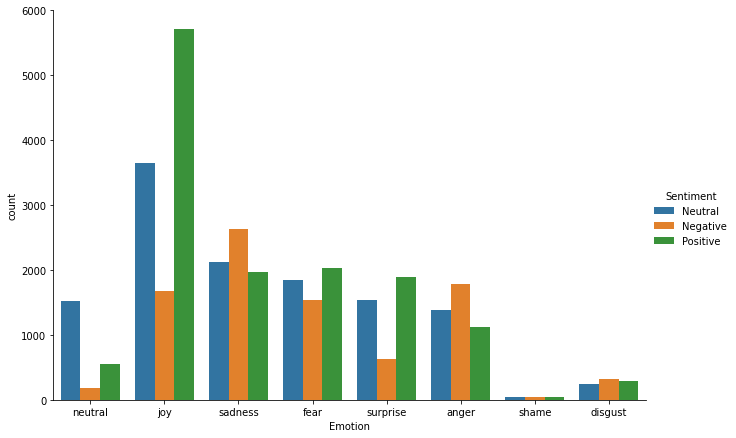

In [37]:
#2. seaborn
sns.factorplot(x='Emotion', hue='Sentiment', data=df, kind='count', size=6, aspect=1.5)

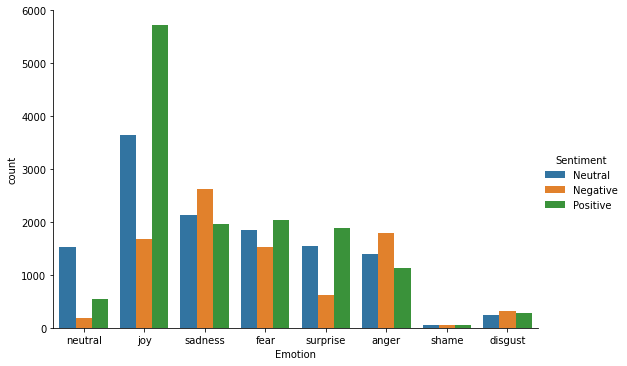

In [38]:
#2. seaborn
sns.catplot(x='Emotion', hue='Sentiment', data=df, kind='count', aspect=1.5)

In [39]:
###text cleaning dir(nfx)

In [40]:
df['Clean_Text']=df['Text'].apply(nfx.remove_stopwords)
df['Clean_Text']=df['Clean_Text'].apply(nfx.remove_punctuations)
df['Clean_Text']=df['Clean_Text'].apply(nfx.remove_userhandles)

In [41]:
df[['Text', 'Clean_Text']]

,Text,Clean_Text
0,Why ?,
1,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow
2,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3,Such an eye ! The true hazel eye-and so brill...,eye true hazel eyeand brilliant Regular feat...
4,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe hugggzzz u babe naamazed nga ako e...
...,...,...
34787,@MichelGW have you gift! Hope you like it! It'...,gift Hope like it hand wear Itll warm Lol
34788,The world didnt give it to me..so the world MO...,world didnt meso world DEFINITELY cnt away
34789,A man robbed me today .,man robbed today
34790,"Youu call it JEALOUSY, I call it of #Losing YO...",Youu JEALOUSY #Losing YOU


In [42]:
#keyword extraction
# extracting most common words per class of emotions


In [43]:
from collections import Counter

In [44]:
def extract_keywords(text, num=50):
  tokens = [tok for tok in text.split()]
  most_common_tokens= Counter(tokens).most_common(num)
  return dict(most_common_tokens)




In [45]:
#list of emotions
emotion_list = df['Emotion'].unique().tolist()

In [46]:
emotion_list

['neutral', 'joy', 'sadness', 'fear', 'surprise', 'anger', 'shame', 'disgust']

In [47]:
joy_list = df[df['Emotion']== 'joy']['Clean_Text'].tolist()

In [48]:
#joy document
joy_docx=' '.join(joy_list)

In [49]:
joy_docx

'Sage Act upgrade list tommorow eye  true hazel eyeand brilliant  Regular features  open countenance  complexion  Oh  bloom health  pretty height size  firm upright figure  health  merely bloom  air  head  glance  hears child  picture health    gives idea complete picture grownup health  loveliness    ugh babe hugggzzz u  babe naamazed nga ako e babe e despite negas mas pinaramdam fil ko ang life  Leopold truly happy : hopes prayers beloved son come fruition  feeling fail french #fuckfrench GoodLet   fell love \\X\\ Overnight felt confidence selfesteem responsible worthwhile terribly ecstatic dangerous thing  selected study university Yeah  ’ ages   passed BA exams class results heard selected fot year university Zambia form Chikola secondary school Welp time study days Heading campus rain grad photos feeling awesome    brings  Ive bought Christmas presents trawl loads shops :) shit pants Pure 100% gravy life  Leopold truly happy : hopes prayers beloved son come fruition  Class jamming

In [50]:
keyword_joy= extract_keywords(joy_docx)

In [51]:
keyword_joy

{'2': 262,
 ':)': 311,
 'Christmas': 453,
 'God': 177,
 'Im': 555,
 'RT': 159,
 'amp': 678,
 'cant': 165,
 'class': 141,
 'day': 729,
 'days': 208,
 'excited': 145,
 'family': 181,
 'feel': 227,
 'feeling': 159,
 'felt': 167,
 'friend': 169,
 'friends': 155,
 'going': 304,
 'good': 345,
 'got': 328,
 'great': 194,
 'happy': 368,
 'home': 302,
 'hour': 172,
 'hours': 251,
 'it': 162,
 'joy': 257,
 'know': 177,
 'life': 251,
 'like': 476,
 'long': 204,
 'love': 393,
 'me': 196,
 'morning': 288,
 'new': 181,
 'night': 332,
 'people': 201,
 'right': 142,
 's': 180,
 'school': 297,
 'sleep': 185,
 'think': 148,
 'time': 602,
 'today': 471,
 'tomorrow': 467,
 'tonight': 205,
 'week': 231,
 'work': 509,
 'year': 225}

In [52]:
#plotting the keywords

def plot_common_words(mydict,emotion_name):
  df_01= pd.DataFrame(mydict.items(), columns=['token','count'])
  plt.figure(figsize=(20,10))
  plt.title("Plot of {}".format(emotion_name))
  sns.barplot(x='token', y='count', data=df_01)
  plt.xticks(rotation=45)
  plt.show()



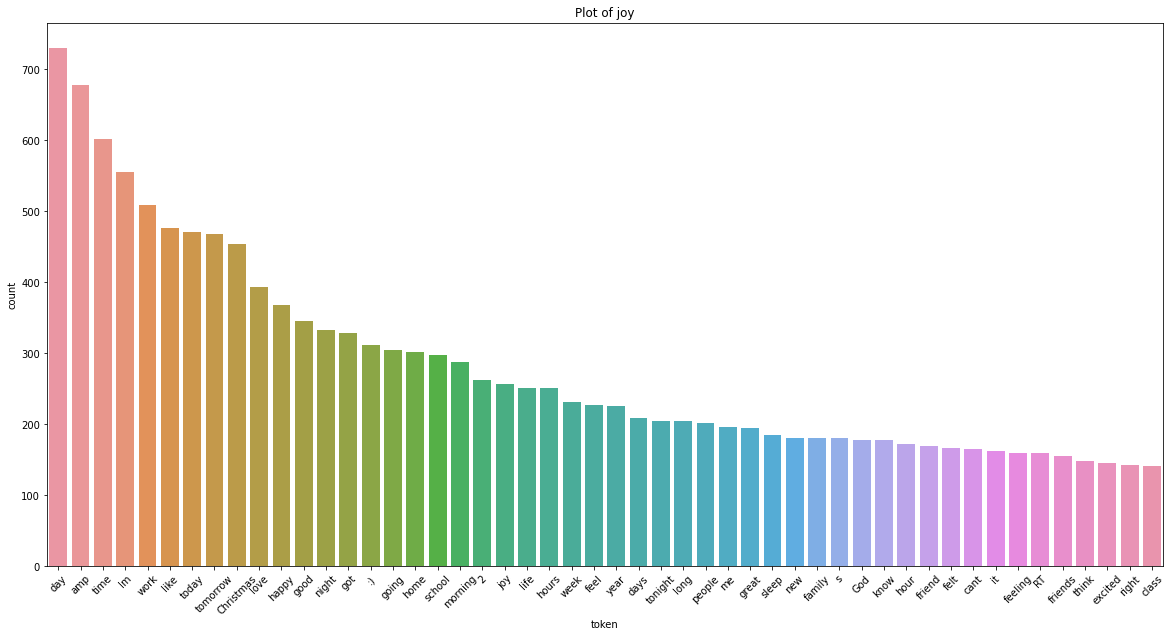

In [53]:
plot_common_words(keyword_joy, "joy")

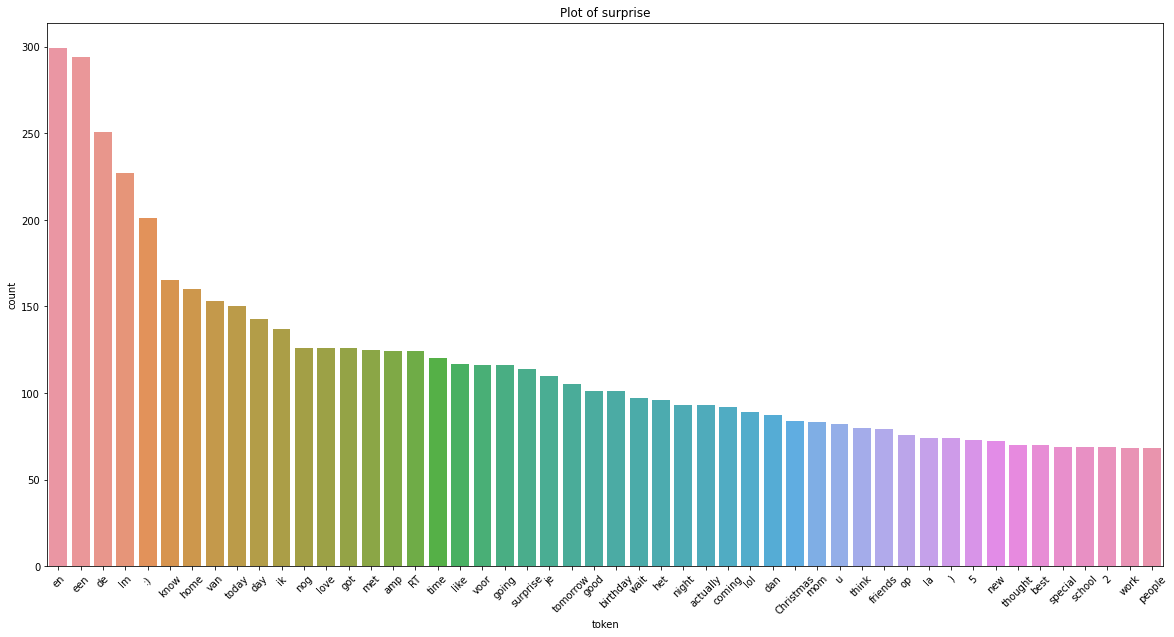

In [54]:
surprise_list = df[df['Emotion']== 'surprise']['Clean_Text'].tolist()
surprise_docx=' '.join(surprise_list)
keyword_surprise= extract_keywords(surprise_docx)
plot_common_words(keyword_surprise, 'surprise')

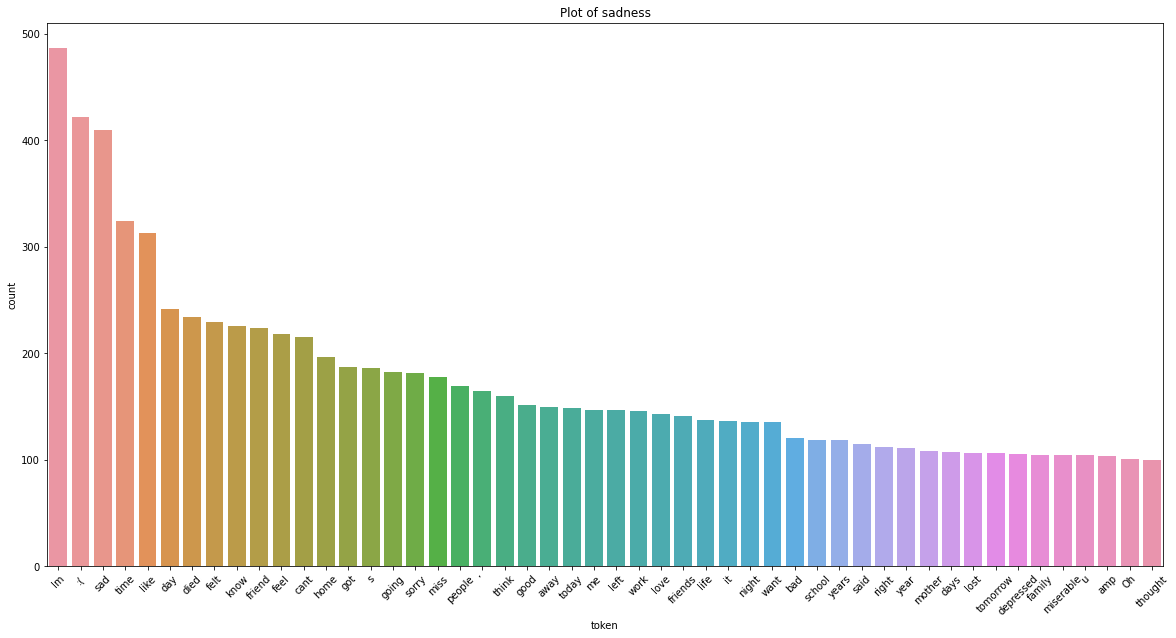

In [55]:
sadness_list = df[df['Emotion']== 'sadness']['Clean_Text'].tolist()
sadness_docx=' '.join(sadness_list)
keyword_sadness= extract_keywords(sadness_docx)
plot_common_words(keyword_sadness, 'sadness')

In [56]:
 #word cloud
 from wordcloud import WordCloud

In [57]:
def plot_wordcloud(docx):
  mywordcloud= WordCloud().generate(docx)
  plt.figure(figsize=(20,10))
  plt.imshow(mywordcloud,interpolation='bilinear')
  plt.axis('off')
  plt.show()


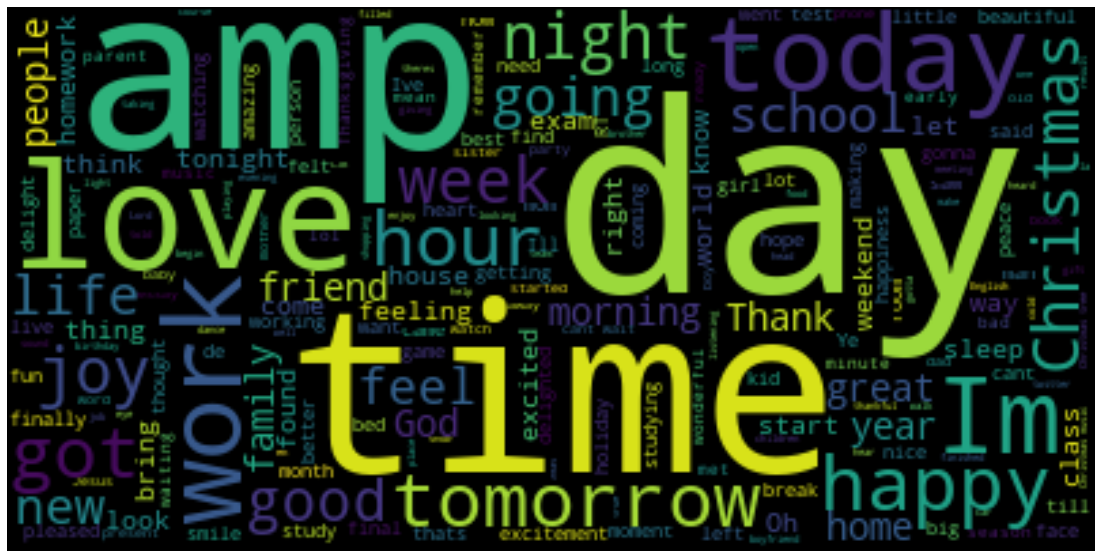

In [58]:
plot_wordcloud(joy_docx)

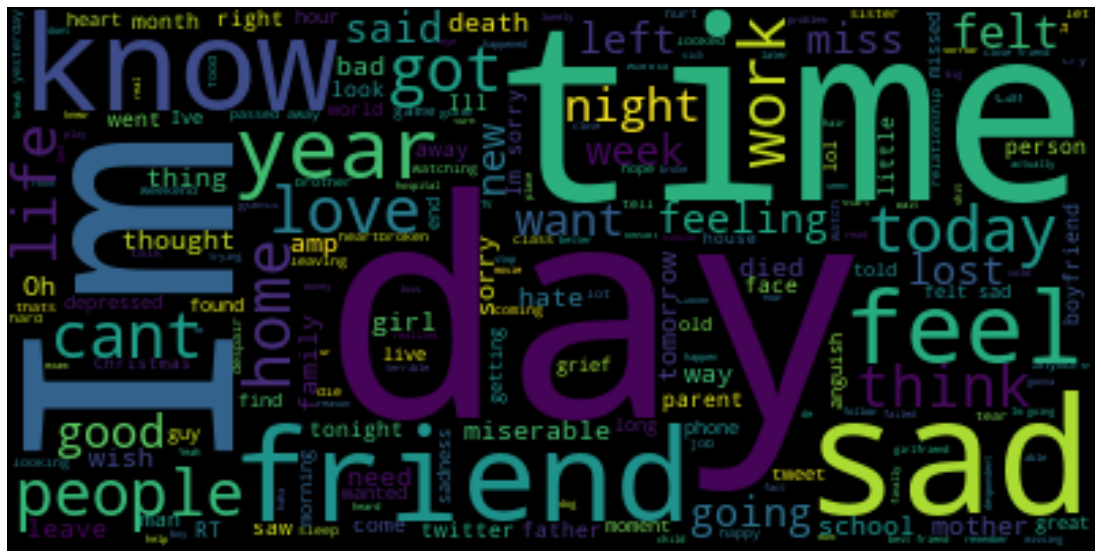

In [59]:
plot_wordcloud(sadness_docx)

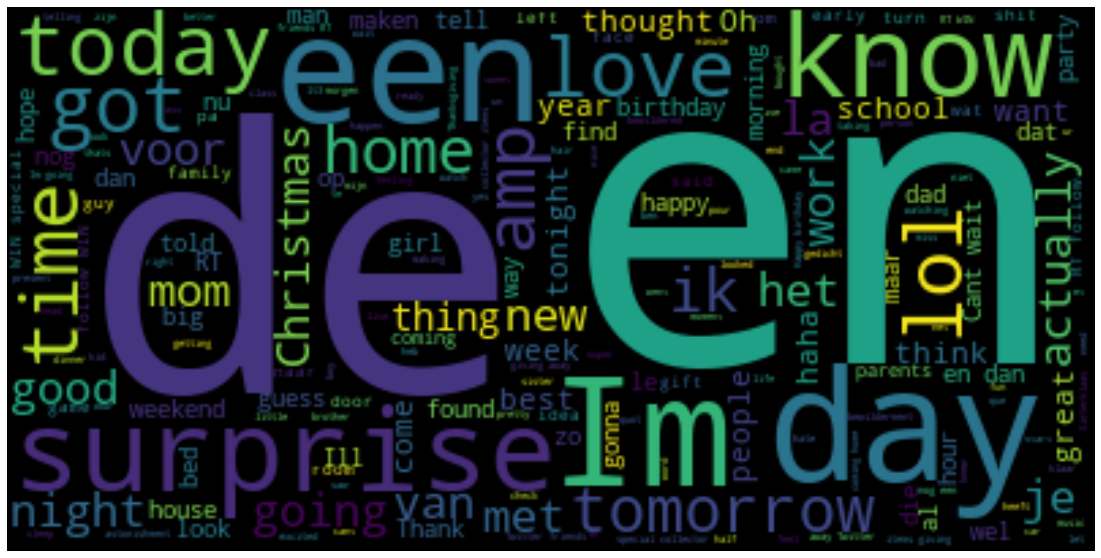

In [60]:
plot_wordcloud(surprise_docx)

#Machine learning
Naive Bayes

KNN

Decision Tress

Logistic Regression

compare with the package called SparkNLP/ NLU Jhon

In [61]:
# loading ml packages
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

#Vectorizer

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer
#Metrics
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,plot_confusion_matrix

In [62]:
#splitting our dataset
from sklearn.model_selection import train_test_split




In [63]:
#Build features from the text


In [64]:
Xfeatures = df['Clean_Text']
ylabels = df['Emotion']

In [65]:
Xfeatures

0                                                         
1                           Sage Act upgrade list tommorow
2        WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3        eye  true hazel eyeand brilliant  Regular feat...
4          ugh babe hugggzzz u  babe naamazed nga ako e...
                               ...                        
34787           gift Hope like it hand wear  Itll warm Lol
34788           world didnt meso world DEFINITELY cnt away
34789                                    man robbed today 
34790                            Youu JEALOUSY #Losing YOU
34791                                think baby dream time
Name: Clean_Text, Length: 34792, dtype: object

In [67]:
cv = CountVectorizer()
X= cv.fit_transform(Xfeatures)

In [ ]:
#getting features by name
cv.get_feature_names()

In [70]:
#spliting dataset

X_train, X_test, y_train, y_test = train_test_split(X, ylabels, test_size=0.3, random_state=42)

BUILDING MODEL 

In [72]:
 nv_model= MultinomialNB()
 nv_model.fit(X_train , y_train)


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [74]:
#Acuuracy1:
nv_model.score(X_test,y_test)


0.5642843456600881

In [75]:
#Predictions
y_pred_nv = nv_model.predict(X_test)
y_pred_nv

array(['fear', 'sadness', 'sadness', ..., 'sadness', 'anger', 'sadness'],
      dtype='<U8')

Making single predictions
Vectorising the texts

Applying the models

In [76]:
sample_text= ["I am a bit sad"]

In [77]:
vect =cv.transform(sample_text).toarray()

In [78]:
nv_model.predict(vect)

array(['sadness'], dtype='<U8')

In [79]:
#checking the prediction probability/confidence
nv_model.predict_proba(vect)


array([[1.37168700e-02, 1.58480802e-03, 3.10389061e-02, 1.63406028e-01,
        2.68412141e-04, 7.82281364e-01, 1.17028224e-05, 7.69190923e-03]])

In [80]:
#getting al;l the classes for model 
nv_model.classes_

array(['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'shame',
       'surprise'], dtype='<U8')

In [81]:
np.max(nv_model.predict_proba(vect))

0.7822813638023628

In [92]:
def predict_emotion(sample_text,model):
  myvect =cv.transform(sample_text).toarray()
  prediction=model.predict(myvect)
  pred_proba=(model.predict_proba(myvect))
  pred_precentage_all=dict(zip(model.classes_,pred_proba[0]))
  print("prediction : {}, Prediction Score :{}".format(prediction[0], np.max(pred_proba)))
  print(prediction[0])
  return pred_precentage_all
  


In [ ]:
predict_emotion(sample_text,nv_model)

In [94]:
predict_emotion(["Don't talk to me"], nv_model)

prediction:joy, Prediction Score:0.4797559171301405
joy


{'anger': 0.3124333997049959,
 'disgust': 0.0018496966127208702,
 'fear': 0.11578937170595634,
 'joy': 0.4797559171301405,
 'neutral': 3.581089244162198e-05,
 'sadness': 0.08488263175660342,
 'shame': 1.3461585816166746e-06,
 'surprise': 0.005251826038559598}

In [95]:
###Model evaluation

In [96]:
#classification report
print(classification_report(y_test , y_pred_nv))

              precision    recall  f1-score   support

       anger       0.64      0.49      0.56      1283
     disgust       0.53      0.03      0.06       292
        fear       0.75      0.60      0.67      1645
         joy       0.51      0.86      0.64      3311
     neutral       0.30      0.02      0.04       675
     sadness       0.56      0.54      0.55      2015
       shame       1.00      0.03      0.05        36
    surprise       0.61      0.27      0.38      1181

    accuracy                           0.56     10438
   macro avg       0.61      0.36      0.37     10438
weighted avg       0.57      0.56      0.53     10438



In [97]:
#Confusion
confusion_matrix(y_test, y_pred_nv)

array([[ 633,    0,   58,  373,    7,  199,    0,   13],
       [  31,   10,   25,  132,    2,   81,    0,   11],
       [  79,    2,  984,  353,    4,  160,    0,   63],
       [  76,    1,  100, 2848,    9,  204,    0,   73],
       [  20,    0,   17,  550,   14,   71,    0,    3],
       [  89,    1,   74,  726,    7, 1080,    0,   38],
       [   9,    0,    7,   13,    0,    5,    1,    1],
       [  49,    5,   47,  621,    4,  135,    0,  320]])

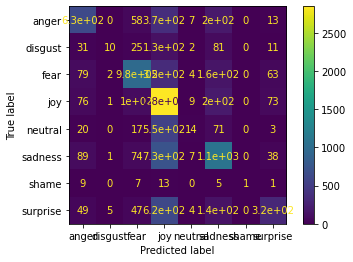

In [99]:
#Plot confusion matrix

plot_confusion_matrix(nv_model, X_test, y_test)

In [100]:
#save model

In [101]:
import joblib

In [102]:
model_file= open('emotion_Class_30_07.pkl',"wb")
joblib.dump(nv_model, model_file)
model_file.close()

In [103]:
#intepretation of model

In [104]:
#logistic regression 
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [105]:
#Accuracy 
lr_model.score(X_test,y_test)

0.622341444721211

In [106]:
#single prediction
predict_emotion(sample_text , lr_model)

prediction:sadness, Prediction Score:0.8728505056335053
sadness


{'anger': 0.019523439519344096,
 'disgust': 0.01906261128096104,
 'fear': 0.009945421551098463,
 'joy': 0.028519926206155677,
 'neutral': 0.03168594891348745,
 'sadness': 0.8728505056335053,
 'shame': 0.0008713284082726025,
 'surprise': 0.017540818487175345}

In [108]:
#intepretting model 
!pip install eli5
import eli5

     |████████████████████████████████| 106 kB 7.7 MB/s 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


In [109]:
#showing the weights for each class/label
eli5.show_weights(lr_model,top=20)

In [110]:
class_names= ylabels.unique().tolist()

In [111]:
feature_names= cv.get_feature_names()

In [120]:
eli5.show_weights(lr_model,feature_names=feature_names, target_names=class_names)